# KNN

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"C:\Users\conte\Downloads\Social_Network_Ads.csv")

In [4]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dataset = dataset.iloc[:,-3:]

In [8]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [11]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

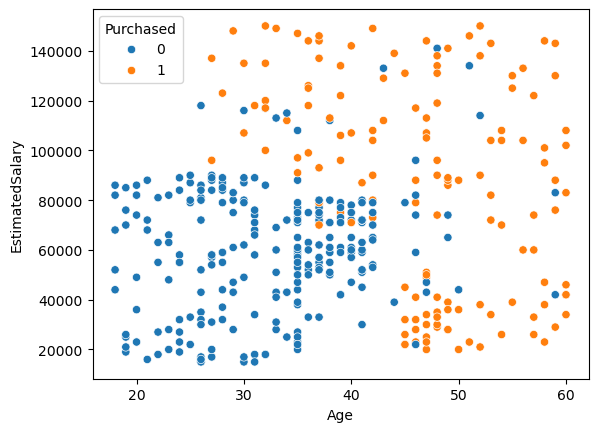

In [13]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
sc.fit(x)

StandardScaler()

In [17]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [18]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
for i in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 99.72222222222223 85.0
2 92.22222222222223 85.0
3 93.33333333333333 95.0
4 91.94444444444444 95.0
5 91.66666666666666 92.5
6 90.55555555555556 95.0
7 91.11111111111111 95.0
8 91.66666666666666 95.0
9 91.38888888888889 95.0
10 91.94444444444444 95.0
11 91.38888888888889 95.0
12 90.83333333333333 95.0
13 91.66666666666666 95.0
14 90.83333333333333 95.0
15 91.38888888888889 95.0
16 90.55555555555556 95.0
17 90.27777777777779 95.0
18 90.0 95.0
19 90.83333333333333 95.0
20 90.27777777777779 95.0
21 90.27777777777779 95.0
22 90.27777777777779 95.0
23 90.27777777777779 95.0
24 90.55555555555556 95.0
25 90.55555555555556 95.0
26 90.55555555555556 95.0
27 90.83333333333333 95.0
28 90.0 95.0
29 90.27777777777779 95.0
30 89.72222222222223 95.0
31 90.0 95.0
32 89.44444444444444 95.0
33 90.0 95.0
34 89.44444444444444 95.0
35 89.72222222222223 95.0
36 89.44444444444444 95.0
37 89.72222222222223 95.0
38 89.44444444444444 95.0
39 89.44444444444444 95.0
40 89.16666666666667 95.0
41 89.44444444444444 

In [55]:
knn.score(x_test,y_test)*100

92.5

In [56]:
knn.score(x_train,y_train)*100

91.66666666666666

In [60]:
knn.predict([[-0.158074	,-1.078938]])

C:\Users\conte\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()